# Diabetes Prediction using dataset from the National Institute of Diabetes and Digestive and Kidney Diseases

Pima Indians Diabetes Dataset
Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

## About the Dataset
Pregnancies :- Number of times a woman has been pregnant

Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose
tolerance test

BloodPressure :- Diastollic Blood Pressure (mm hg)

SkinThickness :- Triceps skin fold thickness(mm)

Insulin :- 2 hour serum insulin(mu U/ml)

BMI :- Body Mass Index ((weight in kg/height in m)^2)

Age :- Age(years)

DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history

Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

----------------------

## Mounting the Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Introduction
Early diagnosis of diabetes is important to prevent the onset of complications. In this project, I will analyze the survey data on health indicators that may be associated with diabetes.

There are two main aims of this project:

* to find out the indicators that are most related to diabetes
* to build a model to predict diabetes

## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from scipy import stats

## Loading the Dataset

In [ ]:
#from google.colab import drive
# Mount Google Drive
#drive.mount('/content/drive')
# Provide the path to your CSV file in Google Drive
#csv_path = '/content/drive/MyDrive/Tanya sbe/Stat Project/dataset/diabetes.csv'
csv_path = "https://raw.githubusercontent.com/Youssef-Ashraf71/Diabetes-Classifier/main/diabetes.csv"

In [ ]:
# Read the CSV file
dframe = pd.read_csv(csv_path)
print(dframe)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

We can observe that all the features are quantitative except for the outcome is
(Yes, the person has diabetes or No, the person hasn't diabetes) categorical
but here in the dataset it is mapped to 1/0

## Variables Classification

In [ ]:
quantitative_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_vars = ['Outcome']

# Data Cleaning

## Checking for Null values

In [ ]:
# Null value count per column": The isnull() function is applied to the DataFrame,
# resulting in a Boolean mask where True represents a missing value and False represents a non-missing value.
dframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Displaying DataFrame information
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## It is not applicable for the values of Glucose | Blood Pressure | Skin Thickness | Insulin | | BMI to be zero. Thus, if any zero values are found, they should be corrected to NAN.

In [ ]:
# Replacing zero values with NaN in selected columns
replace_value = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in replace_value:
    dframe[col].replace({0: np.nan}, inplace=True)

# Updated DataFrame with replaced values
print(dframe)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

## To check the count of Null (NAN) Values



In [ ]:
# Null value count per column": The isnull() function is applied to the DataFrame,
# resulting in a Boolean mask where True represents a missing value and False represents a non-missing value.
dframe.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<font color='Red'>Null Valus Found</font>

## Impute the Null Values with mean for each feature

In [ ]:
# Filling missing values with column means
dframe['BloodPressure'] = dframe['BloodPressure'].fillna(dframe['BloodPressure'].mean())
dframe['SkinThickness']=dframe['SkinThickness'].fillna(dframe['SkinThickness'].mean())
dframe['Glucose']=dframe['Glucose'].fillna(dframe['Glucose'].mean())
dframe['Insulin']=dframe['Insulin'].fillna(dframe['Insulin'].mean())
dframe['BMI']=dframe['BMI'].fillna(dframe['BMI'].mean())
# Updated DataFrame with filled values
print(dframe)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

The code applies the fillna() method to each column individually. The fillna() method replaces missing values in a column with the specified value, which in this case is the mean value of the corresponding column.

The .mean() method calculates the mean of each column using the mean() function from the NumPy library (np).

## To check the count of Null (NAN) Values

In [ ]:
# Creating a new DataFrame to store missing value information
dframe_new = pd.DataFrame()
# Extracting column names
dframe_new['Column'] = dframe.columns
# Calculating missing value counts for each column
dframe_new['Missing_Count'] = [ dframe[col].isnull().sum() for col in dframe.columns ]
# Updated DataFrame with missing value information
print(dframe_new)

                     Column  Missing_Count
0               Pregnancies              0
1                   Glucose              0
2             BloodPressure              0
3             SkinThickness              0
4                   Insulin              0
5                       BMI              0
6  DiabetesPedigreeFunction              0
7                       Age              0
8                   Outcome              0


<font color='green'>Null Values imputed</font>

--------------------------

## Displotting dataframe

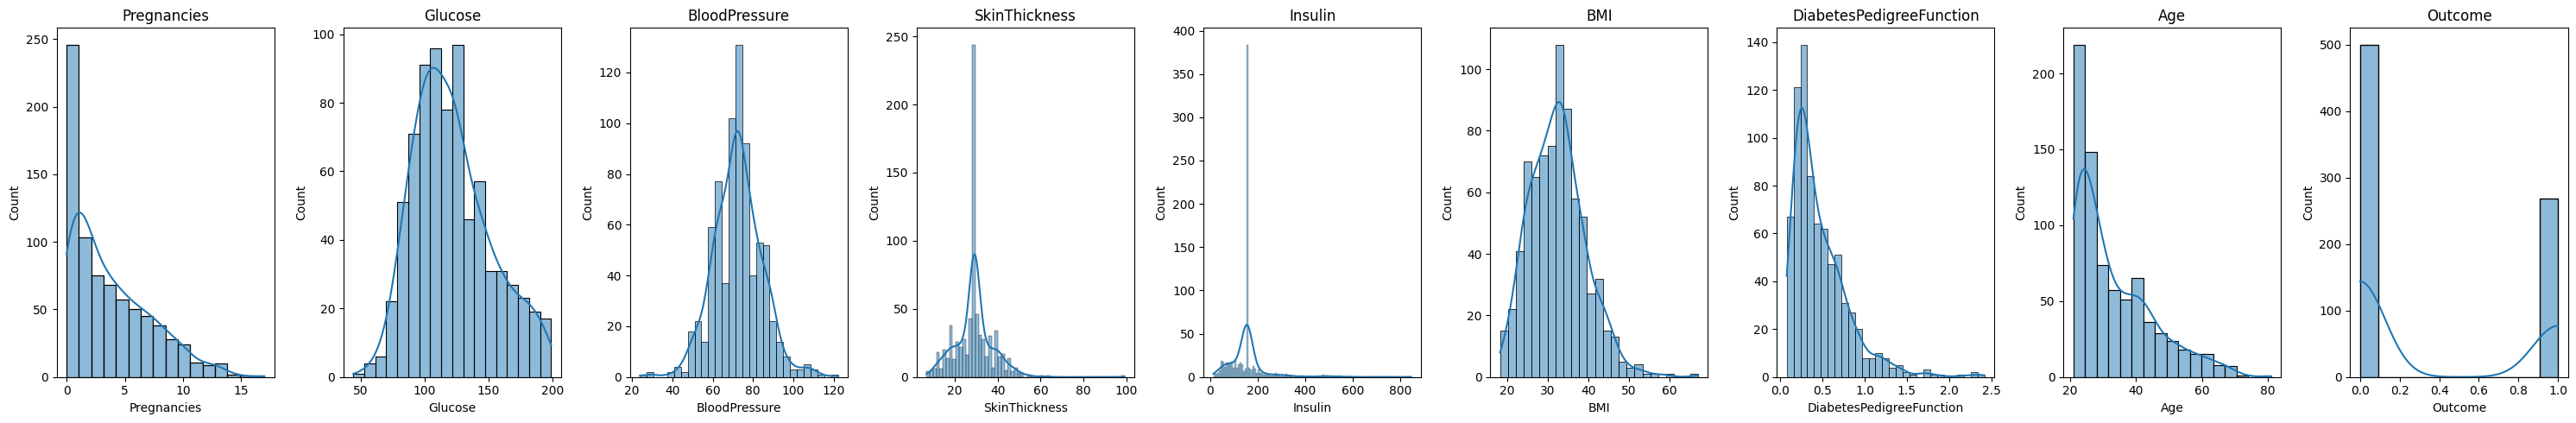

In [ ]:
# Function to create subplots of distribution plots
def create_displot_subplots(dataframe):
    # Determine the number of features (columns) in the DataFrame
    num_features = len(dataframe.columns)
    # Create a figure and axes for subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(30, 5))
    # Iterate over each column and plot distribution using seaborn
    for i, column in enumerate(dataframe.columns):
        sns.histplot(dataframe[column], ax=axes[i], kde=True)
        axes[i].set_title(column)

    # Adjust the layout and display the subplots
    plt.tight_layout()
    plt.show()

# Call the function to generate distribution subplots for the DataFrame
create_displot_subplots(dframe)


* "The <font color='pink'>[GLucose , BMI]</font> distribution exhibits a near-normal shape, with a bell curve and relatively symmetrical data points. However, there are minor deviations from strict normality, such as slightly skewed tails or outliers that cause slight deviations from a perfectly normal distribution."

* The <font color='pink'>[Blood Pressure] </font> distribution exhibits a near-normal shape, but with a prominent peak in the middle indicating a value of unusually high frequency. This central spike adds a distinct feature to an otherwise relatively symmetric distribution.

* The <font color='pink'>[SkinThickness , Insulin ]</font> distribution displays a somewhat normal shape, with a modest resemblance to a bell curve. However, there is a prominent peak in the middle and skewed tails, indicating high departures from a strictly normal distribution.

* The <font color='pink'>[Pregnancies , Age , DiabetesPedigreeFunction ]</font> distribution of the feature is heavily right-skewed, with a majority of the data concentrated towards the lower values and a long tail extending towards the higher values. The distribution lacks a significant portion on the left side, indicating a strong rightward skewness and a presence of extreme values in the upper range.





-----------------------

## Boxplotting dataframe

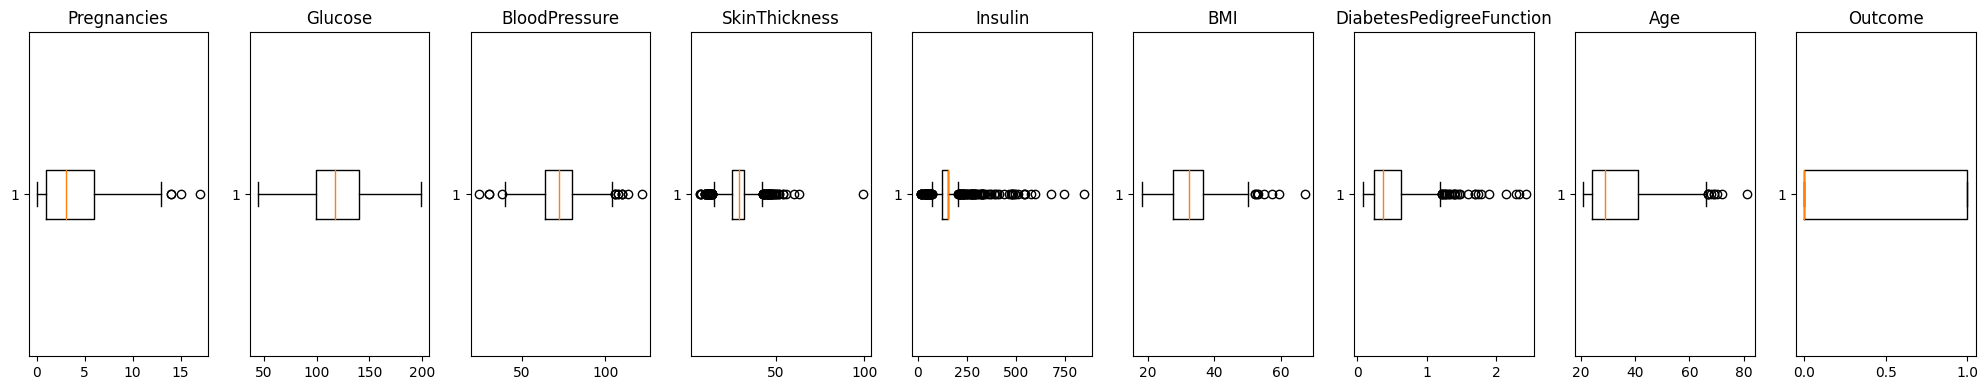

In [ ]:
# Function to create subplots of boxplots
def create_boxplot_subplots(dataframe):
    # Determine the number of features (columns) in the DataFrame
    num_features = len(dataframe.columns)

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(20, 4))

    # Iterate over each column and plot boxplot using matplotlib
    for i, column in enumerate(dataframe.columns):
        axes[i].boxplot(dataframe[column], vert=False)
        axes[i].set_title(column)

    # Adjust the layout and display the subplots
    plt.tight_layout()
    plt.show()

# Call the function to generate boxplot subplots for the DataFrame
create_boxplot_subplots(dframe)


## Implementing shapiro_test, remove_outliers by z-score & IQR

In [ ]:
# Import the necessary libraries
from scipy import stats

# Perform Shapiro-Wilk normality test
def shapiro_test(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    _, p_value = stats.shapiro(data)
    # If p-value is less than alpha (significance level), reject the null hypothesis of normality
    if p_value < alpha:
        return False
    # Failed to reject the null hypothesis of normality
    else:
        return True

# Remove outliers using z-score method
def remove_outliers_zscore(dataframe, column_name, threshold=3):
    data = dataframe[column_name]
    # Calculate z-scores for each data point
    z_scores = np.abs((data - data.mean()) / data.std())
     # Keep data points with z-scores within the specified threshold
    filtered_data = dataframe[z_scores <= threshold]
     # Calculate the number of outliers removed
    outliers_removed = len(data) - len(filtered_data)
    return filtered_data, outliers_removed

# Remove outliers using IQR method
def remove_outliers_iqr(dataframe, column_name, k=2):
    data = dataframe[column_name]
    # Calculate the first quartile
    q1 = data.quantile(0.25)
     # Calculate the third quartile
    q3 = data.quantile(0.75)
    # Calculate the interquartile range
    iqr = q3 - q1
    # Calculate the lower bound for outlier detection
    lower_bound = q1 - k * iqr
     # Calculate the upper bound for outlier detection
    upper_bound = q3 + k * iqr
    # Keep data points within the bounds
    filtered_data = dataframe[(data >= lower_bound) & (data <= upper_bound)]
    # Calculate the number of outliers removed
    outliers_removed = len(data) - len(filtered_data)

    return filtered_data, outliers_removed


------------------------------

## Removing Outliers Section
In general if we have outliers we can handle them by:
* if the distribution is Normal ----> use Z-score method
* if ths distribution isn't Normal ------> use Inter_Quartile Method

-------------

### Remove outliers from Pregnancies

Lets conduct shapiro_test to see if the Pregnancies distribution is normal
we do this test to choose the appropiate method for removing our outliers




In [ ]:
print(shapiro_test(dframe , 'Pregnancies'))

False


* use interquartile

Number of Outliers removed: 1


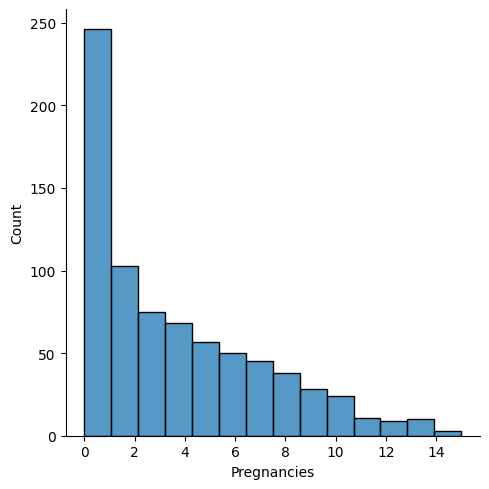

In [ ]:
dframe, outliers_removed = remove_outliers_iqr(dframe , 'Pregnancies')
print(f"Number of Outliers removed: {outliers_removed}")
sns.displot(dframe['Pregnancies'])

### Remove outliers from BloodPressure





Lets conduct shapiro_test to see if the BloodPressure distribution is normal
we do this test to choose the appropiate method for removing our outliers




In [ ]:
print(shapiro_test(dframe , 'BloodPressure'))

False


* use interquartile

Number of Outliers removed: 5


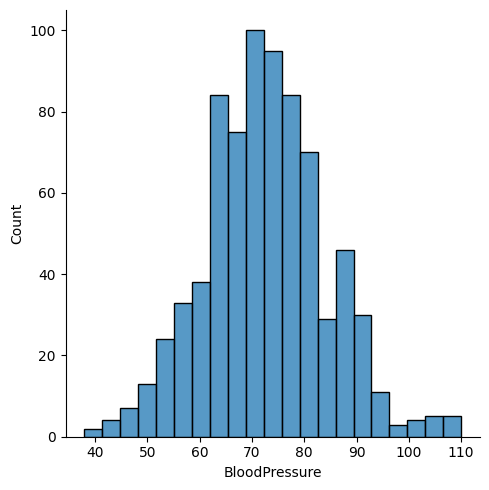

In [ ]:
dframe, outliers_removed = remove_outliers_iqr(dframe , 'BloodPressure')
print(f"Number of Outliers removed: {outliers_removed}")
sns.displot(dframe['BloodPressure'])

### Remove outliers from SkinThickness



Lets conduct shapiro_test to see if the SkinThickness distribution is normal
we do this test to choose the appropiate method for removing our outliers




In [ ]:
print(shapiro_test(dframe , 'SkinThickness'))

False


* use interquartile

Number of Outliers removed: 32


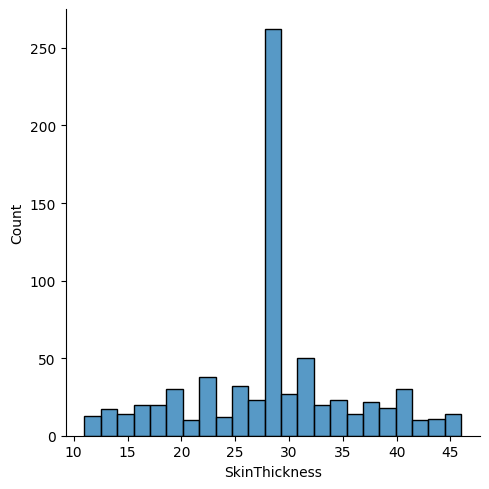

In [ ]:
dframe, outliers_removed = remove_outliers_iqr(dframe , 'SkinThickness')
print(f"Number of Outliers removed: {outliers_removed}")
sns.displot(dframe['SkinThickness'])

### Remove outliers from DiabetesPedigreeFunction

Lets conduct shapiro_test to see if the DiabetesPedigreeFunction distribution is normal
we do this test to choose the appropiate method for removing our outliers




In [ ]:
shapiro_test(dframe , 'DiabetesPedigreeFunction')

False

* use interquartile

Number of Outliers removed: 15


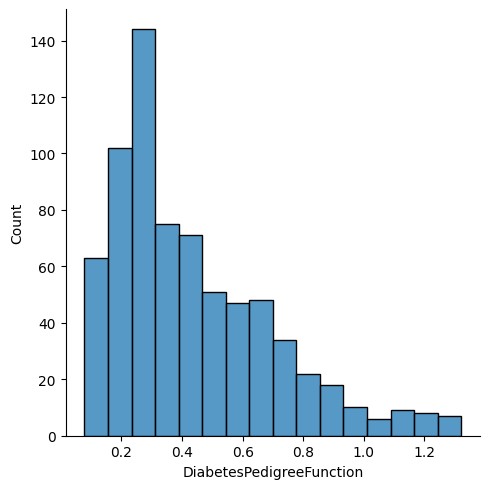

In [ ]:
dframe, outliers_removed = remove_outliers_iqr(dframe , 'DiabetesPedigreeFunction')
print(f"Number of Outliers removed: {outliers_removed}")
sns.displot(dframe['DiabetesPedigreeFunction'])

### Remove outliers from Age

Lets conduct shapiro_test to see if the Age distribution is normal
we do this test to choose the appropiate method for removing our outliers



In [ ]:
shapiro_test(dframe , 'Age')

False

* use interquartile

Number of Outliers removed: 1


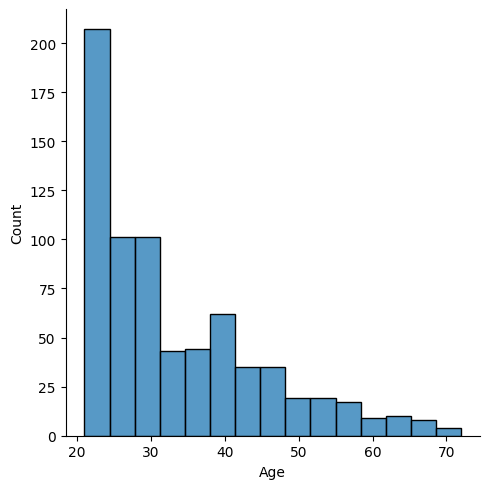

In [ ]:
dframe, outliers_removed = remove_outliers_iqr(dframe , 'Age')
print(f"Number of Outliers removed: {outliers_removed}")
sns.displot(dframe['Age'])

### Remove outliers from BMI

Lets conduct shapiro_test to see if the BMI distribution is normal
we do this test to choose the appropiate method for removing our outliers




In [ ]:
shapiro_test(dframe , 'BMI')

False

* use interquartile

Number of Outliers removed: 2


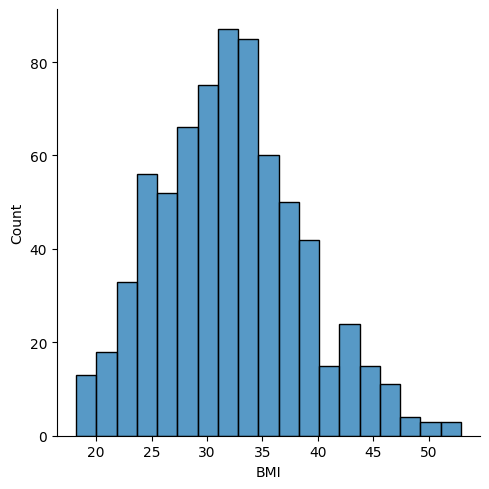

In [ ]:
dframe, outliers_removed = remove_outliers_iqr(dframe , 'BMI')
print(f"Number of Outliers removed: {outliers_removed}")
sns.displot(dframe['BMI'])

### Remove outliers from Insulin

Lets conduct shapiro_test to see if the Insulin distribution is normal
we do this test to choose the appropiate method for removing our outliers




In [ ]:
shapiro_test(dframe , 'Insulin')

False

* use interquartile

Number of Outliers removed: 119


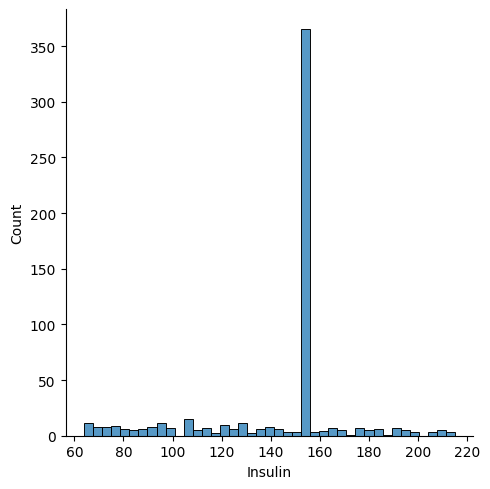

In [ ]:
dframe, outliers_removed = remove_outliers_iqr(dframe , 'Insulin')
print(f"Number of Outliers removed: {outliers_removed}")
sns.displot(dframe['Insulin'])

---------------------------

## Check For Duplicates:

In [ ]:
dframe.duplicated().sum()

0

<font color='green'>No Duplicates found</font>

-----------------------

----------------------------------------

## Calculating the Descriptive Statstics

In [ ]:
print(dframe.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   593.000000  593.000000     593.000000      593.00000  593.000000   
mean      4.001686  120.542575      72.592212       28.65440  144.460054   
std       3.325017   28.412377      11.194591        6.70838   29.925421   
min       0.000000   44.000000      38.000000       11.00000   64.000000   
25%       1.000000  100.000000      65.000000       27.00000  140.000000   
50%       3.000000  116.000000      72.405184       29.15342  155.548223   
75%       6.000000  137.000000      80.000000       31.00000  155.548223   
max      15.000000  197.000000     110.000000       46.00000  215.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  593.000000                593.000000  593.000000  593.000000  
mean    31.997934                  0.428865   33.715008    0.352445  
std      6.281135                  0.260173   11.741503    0.478135  
min     18.200000                  

In [ ]:
# Calculate median
median_values = dframe.median()
# Calculate variance
variance_values = dframe.var()
print("\nMedian for each Feature:")
print(median_values)
print("\nVariance for each Feature:")
print(variance_values)


Median for each Feature:
Pregnancies                   3.000000
Glucose                     116.000000
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.000000
DiabetesPedigreeFunction      0.347000
Age                          30.000000
Outcome                       0.000000
dtype: float64

Variance for each Feature:
Pregnancies                  11.055740
Glucose                     807.263190
BloodPressure               125.318872
SkinThickness                45.002361
Insulin                     895.530839
BMI                          39.452652
DiabetesPedigreeFunction      0.067690
Age                         137.862899
Outcome                       0.228613
dtype: float64


---------------------------------

# Check the Association between the variables & EDA:

Text(0.5, 1.0, 'Correlation')

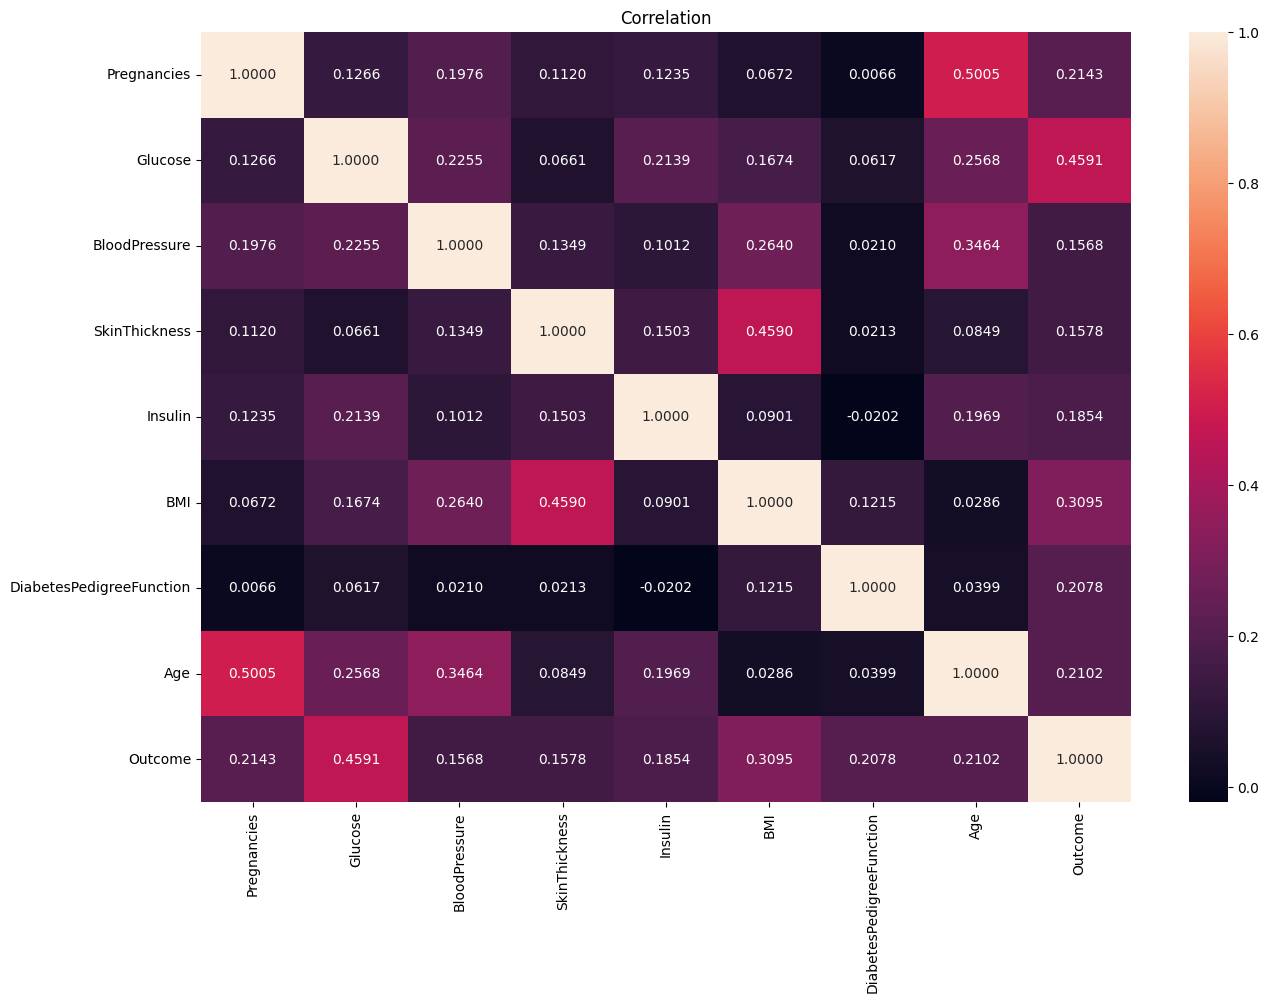

In [ ]:
# Set the figure size for the heatmap
plt.figure(figsize=(15, 10))
# Create the correlation heatmap
sns.heatmap(dframe.corr(), cbar=True, fmt='.4f', annot=True)
# Set the title of the heatmap
plt.title('Correlation')

---------------

---------------------------

## Visualizing the data

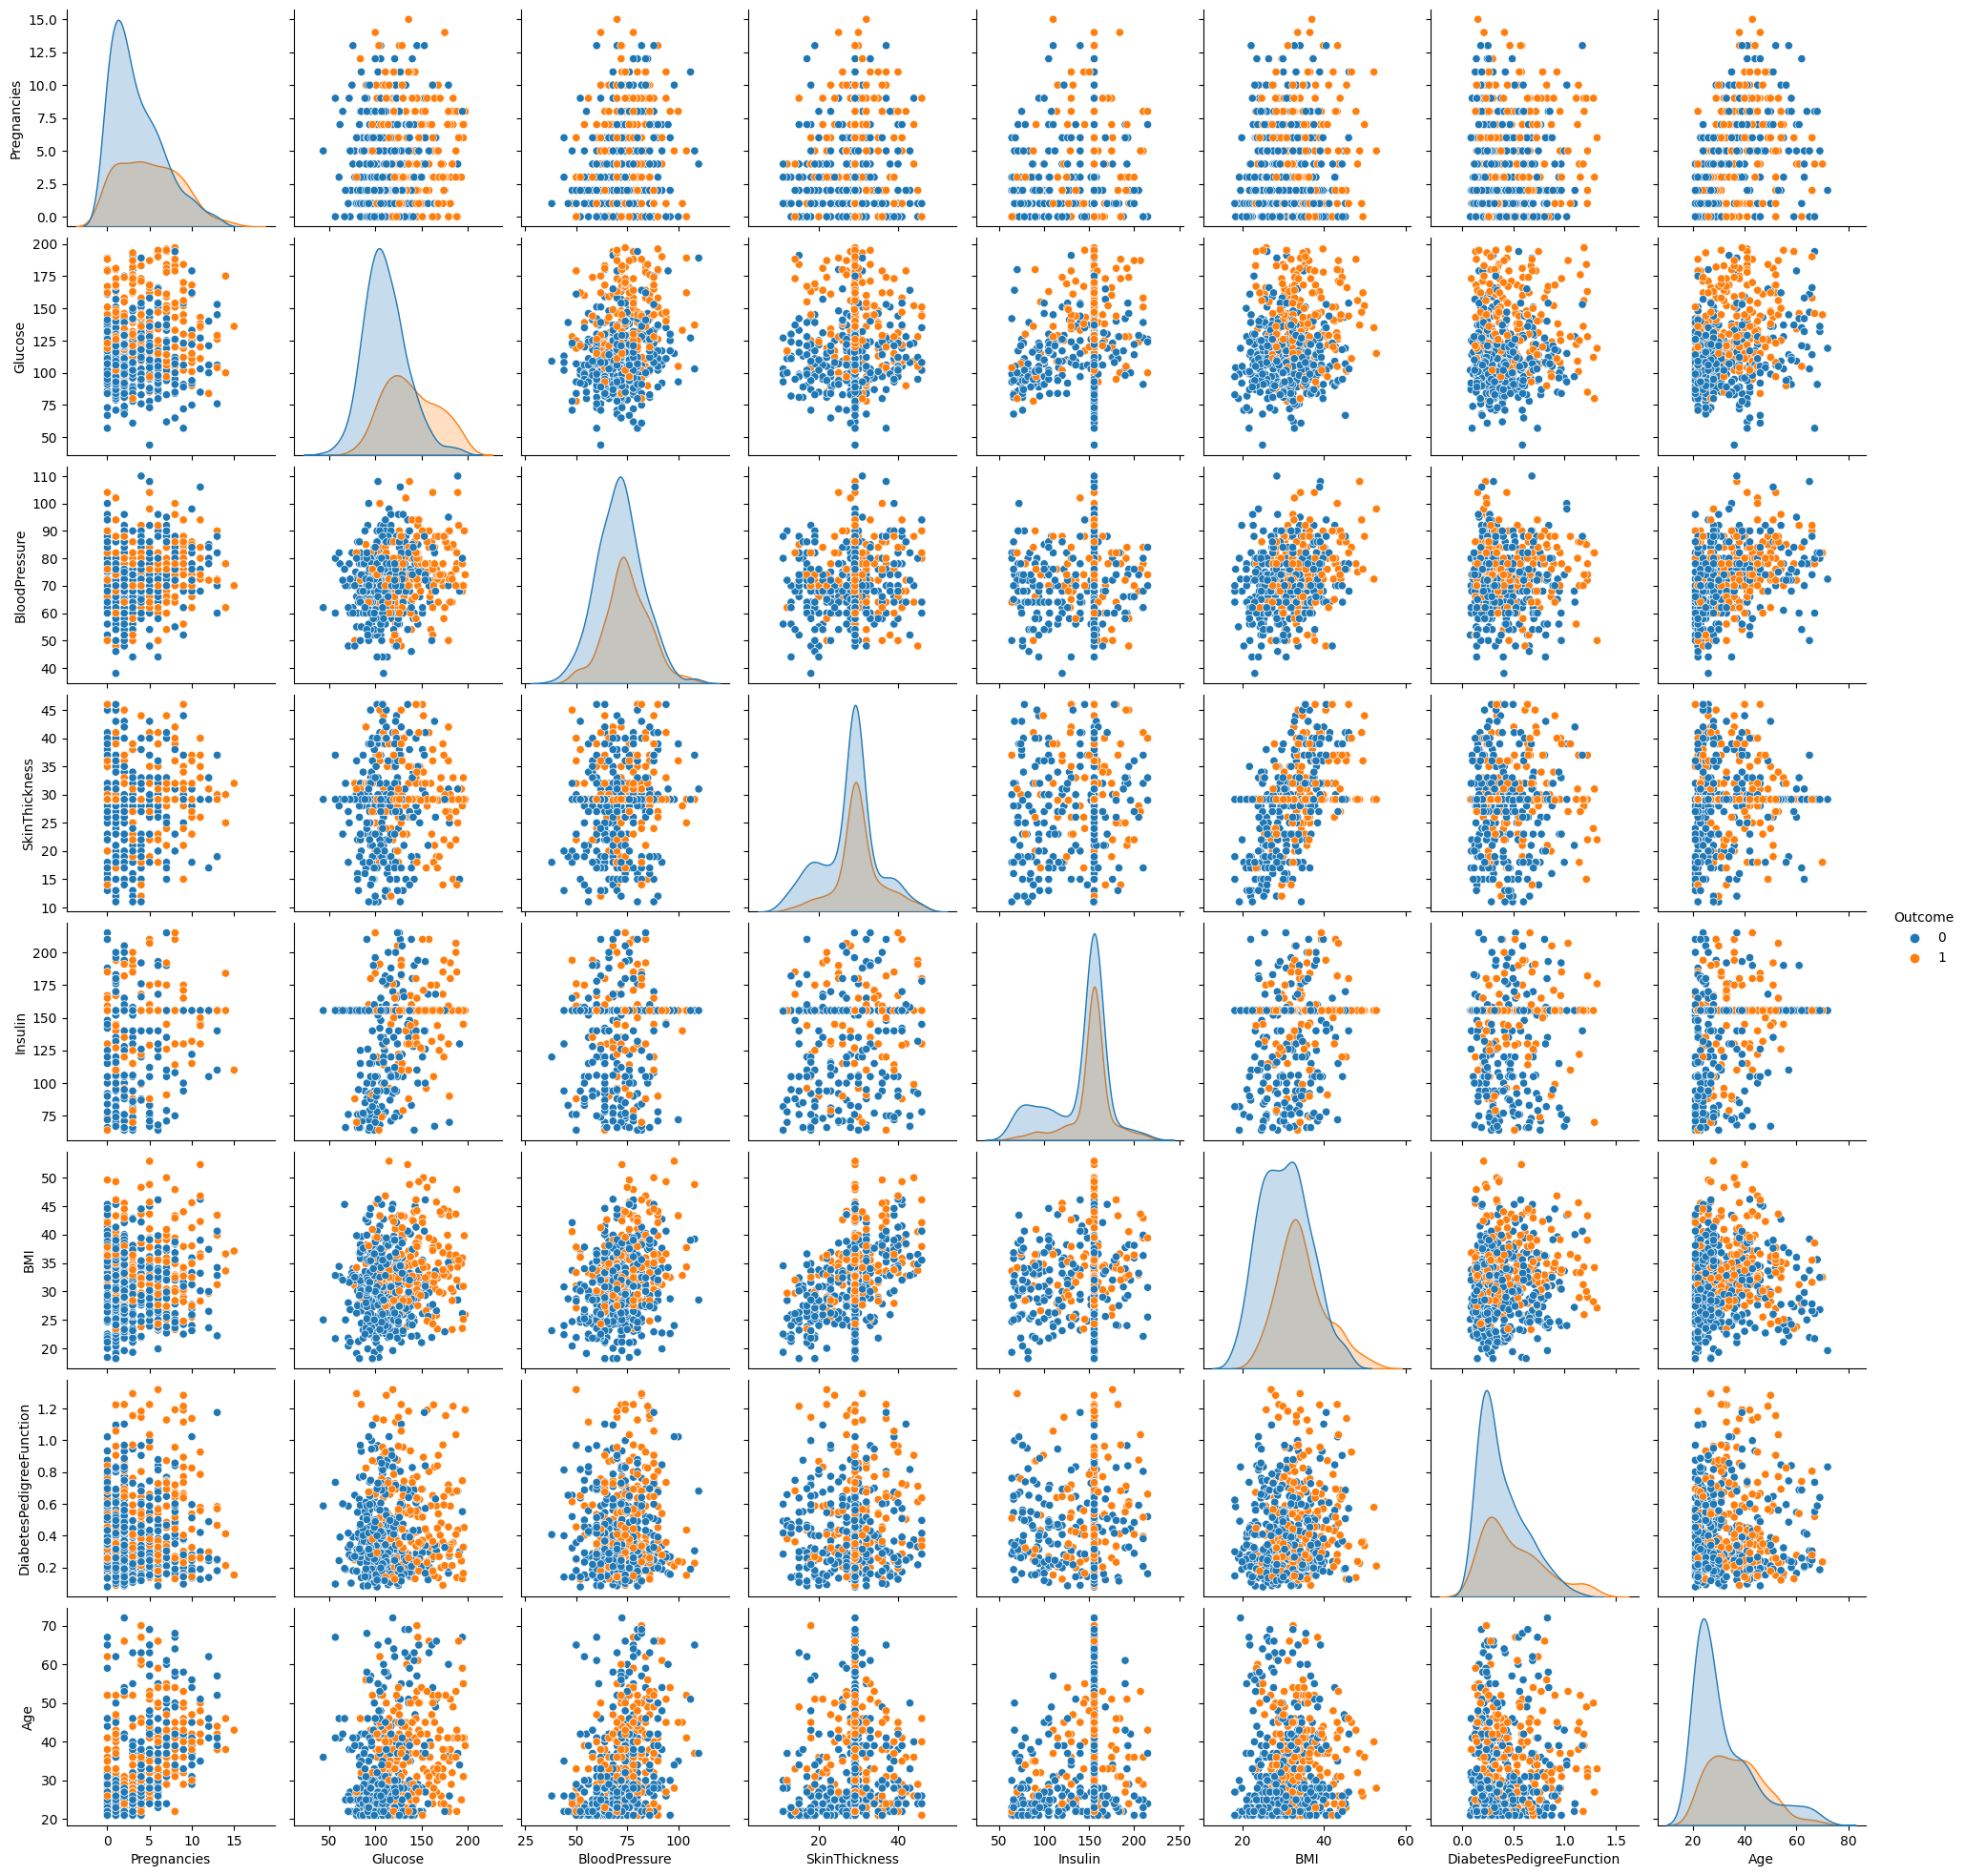

In [ ]:
sns.pairplot(hue='Outcome',data=dframe,kind="scatter")

The resulting pair plot will show scatter plots for each pair of variables in the DataFrame (dframe), with different colors representing different outcomes based on the 'Outcome' column.

orange--> 1 ---> have diabetes

blue ---> 0 ---> don't have diabetes




## Feature vs. Target Visualization

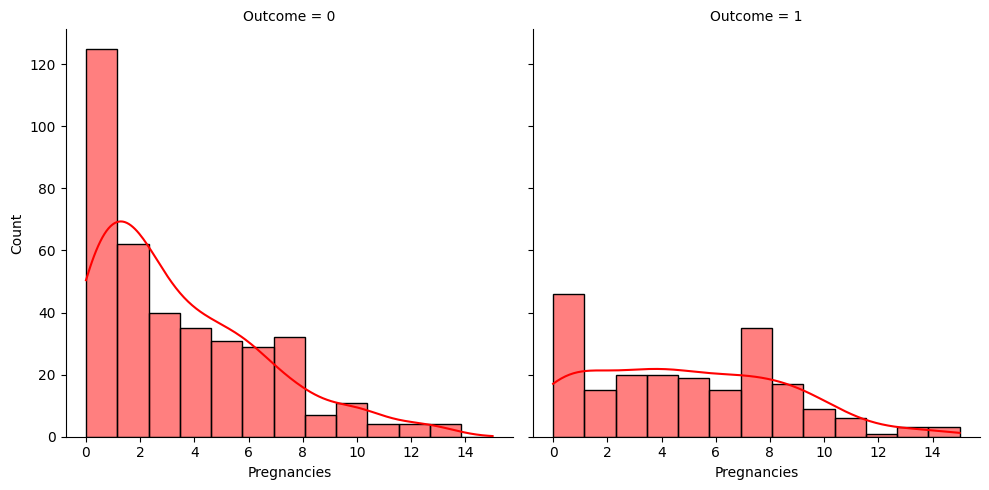

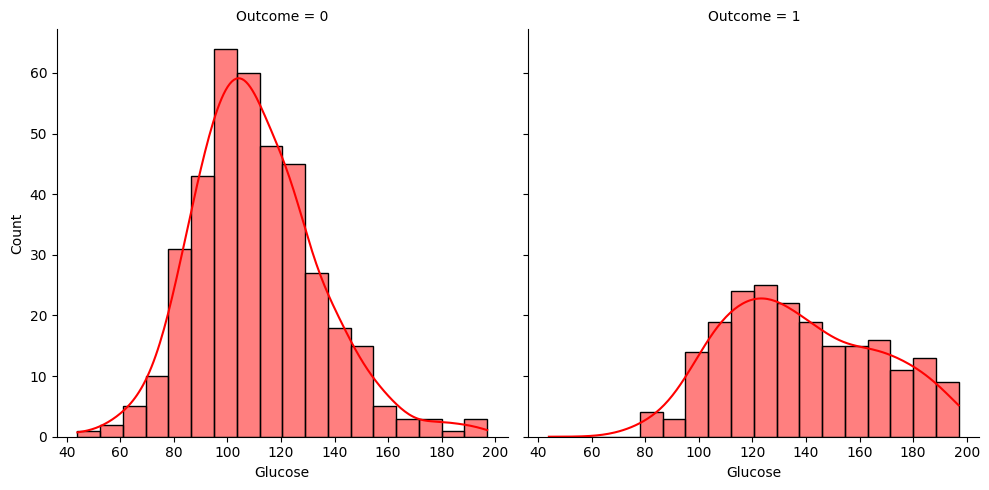

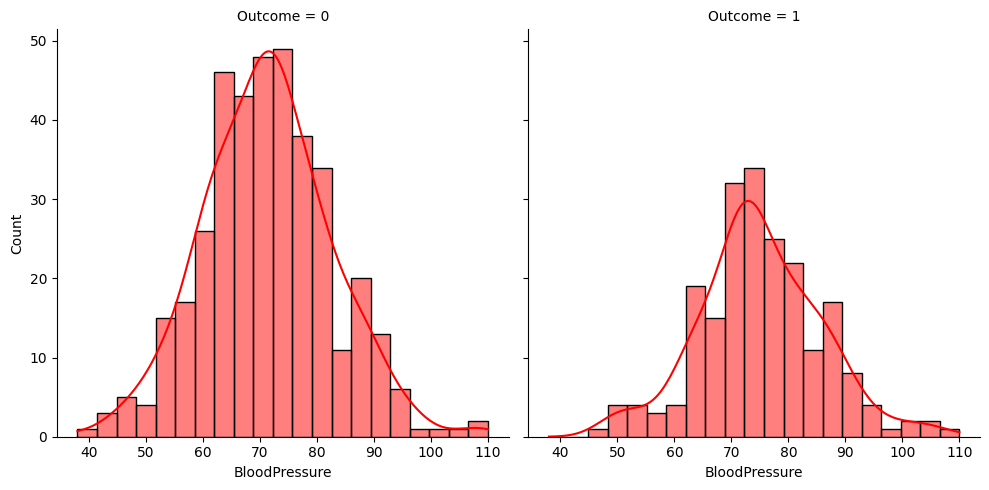

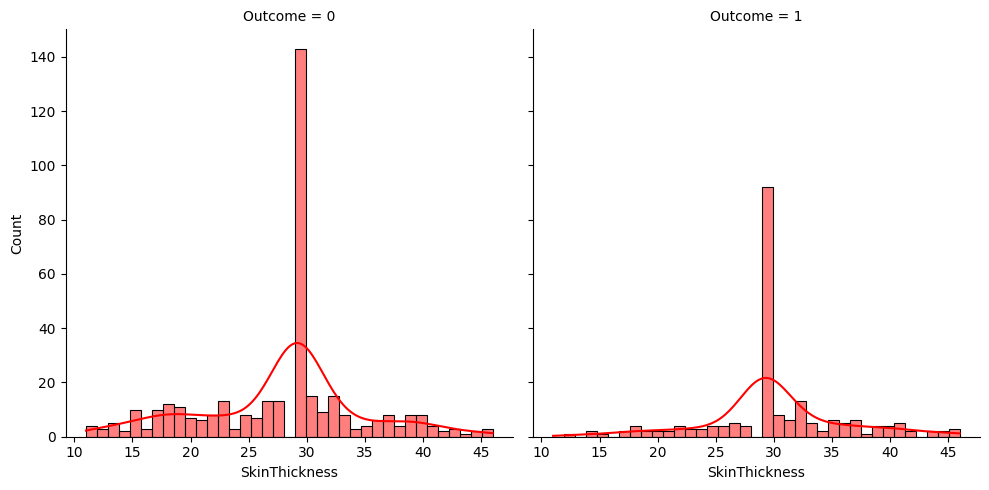

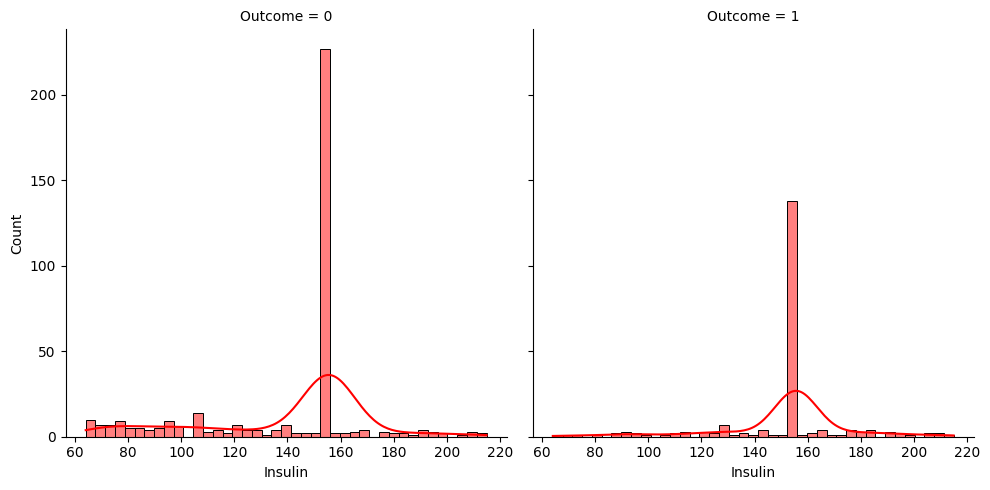

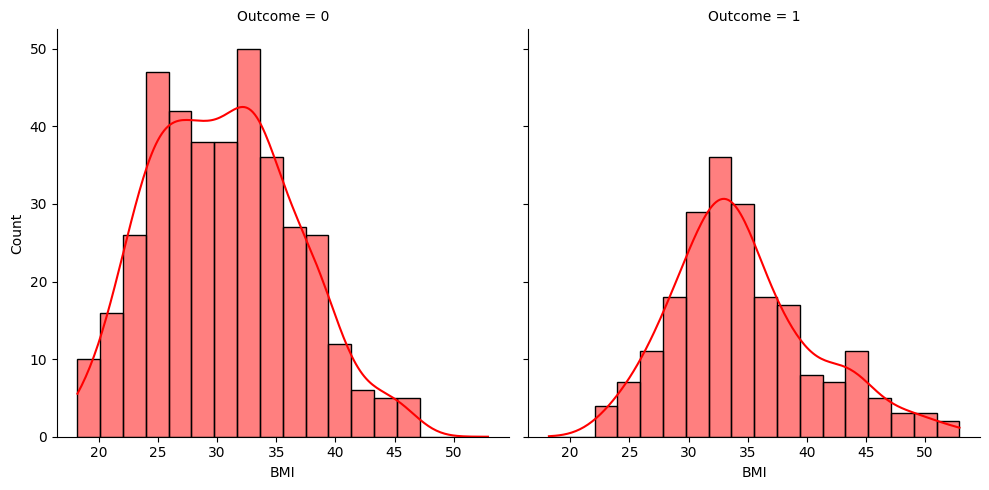

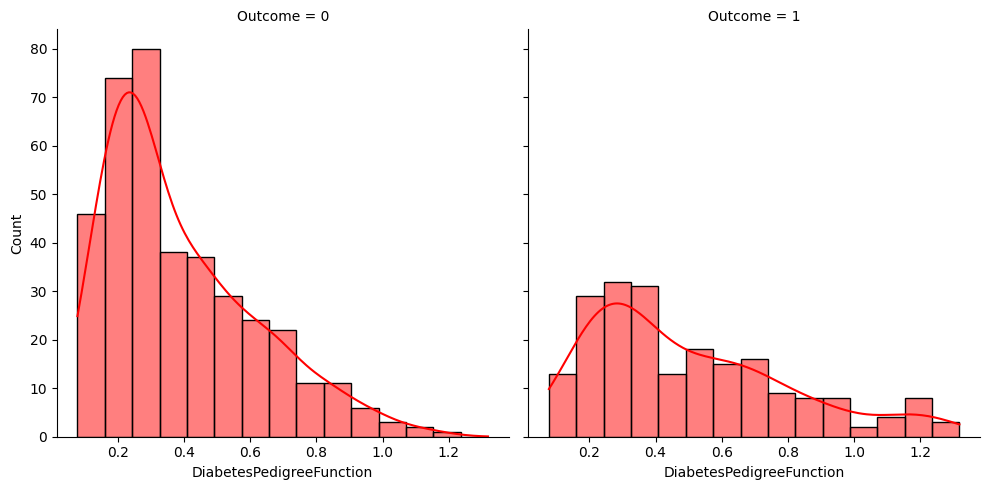

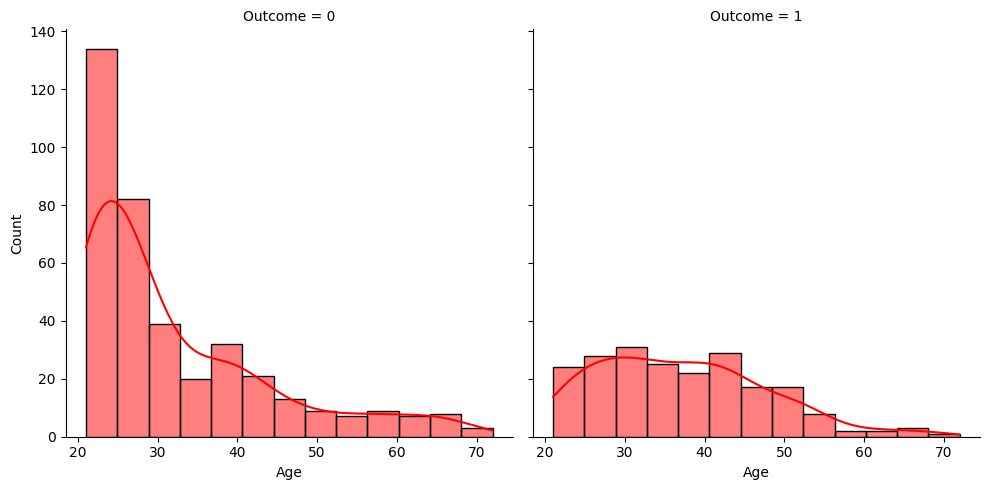

In [ ]:
for col in quantitative_vars:
    sns.displot(data=dframe, x=col, col="Outcome", kde= True,color='r')

This code snippet loops through each quantitative variable specified in the quantitative_vars list. Within each iteration, a distribution plot is generated using the sns.displot() function.

* data=dframe specifies the DataFrame from which the data is taken.
* x=col sets the variable to be plotted on the x-axis, where col represents the current variable in the iteration.
* col="Outcome" groups the plots based on the unique values in the "Outcome" column, creating separate plots for each value.

By utilizing the kde=True parameter, a kernel density estimate line is added to each plot, providing a smooth representation of the distribution.

--------------------

-----------------------

## Data After Cleaning

In [ ]:
print(dframe)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
5              5    116.0           74.0       29.15342  155.548223  25.6   
..           ...      ...            ...            ...         ...   ...   
762            9     89.0           62.0       29.15342  155.548223  22.5   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [ ]:
print(dframe.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   593.000000  593.000000     593.000000      593.00000  593.000000   
mean      4.001686  120.542575      72.592212       28.65440  144.460054   
std       3.325017   28.412377      11.194591        6.70838   29.925421   
min       0.000000   44.000000      38.000000       11.00000   64.000000   
25%       1.000000  100.000000      65.000000       27.00000  140.000000   
50%       3.000000  116.000000      72.405184       29.15342  155.548223   
75%       6.000000  137.000000      80.000000       31.00000  155.548223   
max      15.000000  197.000000     110.000000       46.00000  215.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  593.000000                593.000000  593.000000  593.000000  
mean    31.997934                  0.428865   33.715008    0.352445  
std      6.281135                  0.260173   11.741503    0.478135  
min     18.200000                  

In [ ]:
# Calculate median
median_values = dframe.median()
# Calculate variance
variance_values = dframe.var()
print("\nMedian for each Feature:")
print(median_values)
print("\nVariance for each Feature:")
print(variance_values)


Median for each Feature:
Pregnancies                   3.000000
Glucose                     116.000000
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.000000
DiabetesPedigreeFunction      0.347000
Age                          30.000000
Outcome                       0.000000
dtype: float64

Variance for each Feature:
Pregnancies                  11.055740
Glucose                     807.263190
BloodPressure               125.318872
SkinThickness                45.002361
Insulin                     895.530839
BMI                          39.452652
DiabetesPedigreeFunction      0.067690
Age                         137.862899
Outcome                       0.228613
dtype: float64


---------------------

## Standardize the dataset

In [ ]:
def standardize_features(data, columns):
    """
    Standardizes the specified columns in the given DataFrame.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - columns (list): A list of column names to be standardized.

    Returns:
    - DataFrame: The standardized DataFrame.
    """
    for col in columns:
        mean = data[col].mean()
        std = data[col].std()
        data[col] = (data[col] - mean) / std
    return data
# Standardize the quantitative variables in the DataFrame
dframe = standardize_features(dframe, quantitative_vars)
# Display the standardized DataFrame
print(dframe)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.600993  0.966390      -0.052902       0.945921  0.370527  0.255060   
1      -0.902758 -1.250954      -0.588875       0.051518  0.370527 -0.859388   
2       1.202494  2.198247      -0.767532       0.074388  0.370527 -1.384771   
3      -0.902758 -1.110170      -0.588875      -0.842886 -1.686194 -0.620578   
5       0.300243 -0.159880       0.125756       0.074388  0.370527 -1.018595   
..           ...       ...            ...            ...       ...       ...   
762     1.503244 -1.110170      -0.946190       0.074388  0.370527 -1.512137   
764    -0.602008  0.051295      -0.231559      -0.246617  0.370527  0.764522   
765     0.300243  0.016099      -0.052902      -0.842886 -1.084698 -0.923071   
766    -0.902758  0.192079      -1.124848       0.074388  0.370527 -0.302164   
767    -0.902758 -0.969387      -0.231559       0.349652  0.370527 -0.254402   

     DiabetesPedigreeFunction       Age

In [ ]:
print(dframe.describe())

        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  5.930000e+02  5.930000e+02   5.930000e+02   5.930000e+02  5.930000e+02   
mean   4.792868e-17 -5.691531e-17   1.340505e-15  -1.737415e-16 -1.198217e-16   
std    1.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00   
min   -1.203508e+00 -2.693987e+00  -3.090083e+00  -2.631694e+00 -2.688686e+00   
25%   -9.027581e-01 -7.230150e-01  -6.782036e-01  -2.466169e-01 -1.490390e-01   
50%   -3.012575e-01 -1.598801e-01  -1.670694e-02   7.438751e-02  3.705267e-01   
75%    6.009935e-01  5.792343e-01   6.617293e-01   3.496522e-01  3.705267e-01   
max    3.307746e+00  2.690990e+00   3.341595e+00   2.585662e+00  2.357191e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  5.930000e+02              5.930000e+02  5.930000e+02  593.000000  
mean   2.126835e-16              2.246657e-16  2.246657e-18    0.352445  
std    1.000000e+00              1.000000e+00  1

In [ ]:
# Calculate median
median_values = dframe.median()
# Calculate variance
variance_values = dframe.var()
print("\nMedian for each Feature:")
print(median_values)
print("\nVariance for each Feature:")
print(variance_values)


Median for each Feature:
Pregnancies                -0.301257
Glucose                    -0.159880
BloodPressure              -0.016707
SkinThickness               0.074388
Insulin                     0.370527
BMI                         0.000329
DiabetesPedigreeFunction   -0.314656
Age                        -0.316400
Outcome                     0.000000
dtype: float64

Variance for each Feature:
Pregnancies                 1.000000
Glucose                     1.000000
BloodPressure               1.000000
SkinThickness               1.000000
Insulin                     1.000000
BMI                         1.000000
DiabetesPedigreeFunction    1.000000
Age                         1.000000
Outcome                     0.228613
dtype: float64


<font color="pink"> We can observe that our mean is not exactly equal to zero after standardizing the features using the standardize_features() function is likely due to floating-point precision limitations. When performing arithmetic operations and calculations involving decimal numbers, there can be some small rounding errors but in general all means are close to zero </font>

-----------------

# SPLITTING THE DATASET INTO TRAINING / TEST SET

## Before Splitting

In [ ]:
x = dframe.iloc[:,0:-1]
print(x)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.600993  0.966390      -0.052902       0.945921  0.370527  0.255060   
1      -0.902758 -1.250954      -0.588875       0.051518  0.370527 -0.859388   
2       1.202494  2.198247      -0.767532       0.074388  0.370527 -1.384771   
3      -0.902758 -1.110170      -0.588875      -0.842886 -1.686194 -0.620578   
5       0.300243 -0.159880       0.125756       0.074388  0.370527 -1.018595   
..           ...       ...            ...            ...       ...       ...   
762     1.503244 -1.110170      -0.946190       0.074388  0.370527 -1.512137   
764    -0.602008  0.051295      -0.231559      -0.246617  0.370527  0.764522   
765     0.300243  0.016099      -0.052902      -0.842886 -1.084698 -0.923071   
766    -0.902758  0.192079      -1.124848       0.074388  0.370527 -0.302164   
767    -0.902758 -0.969387      -0.231559       0.349652  0.370527 -0.254402   

     DiabetesPedigreeFunction       Age

In [ ]:
y = dframe.iloc[:,-1]
print(y)

0      1
1      0
2      1
3      0
5      0
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 593, dtype: int64


----------------

## After Splitting

In [ ]:
x_train, x_test , y_train , y_test= train_test_split(x,y, test_size=0.2, random_state=41)
print(x_train.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
417    -0.000507  0.825606       0.840387       0.498720  0.370527  1.035174   
629    -0.000507 -0.934191      -0.678204      -0.991953  0.370527 -1.161881   
576     0.600993 -0.441448      -2.554109      -1.290088 -0.483203 -1.273326   
27     -0.902758 -0.828603      -0.588875      -2.035424 -0.149039 -1.400692   
310     0.600993 -1.426934      -0.588875       0.200585  0.370527 -0.923071   

     DiabetesPedigreeFunction       Age  
417                  0.480968  0.279776  
629                 -1.079531 -1.082911  
576                  1.476459  0.109440  
27                   0.223447 -0.997743  
310                 -0.445338  0.620448  


In [ ]:
print(y_train.head())

417    1
629    0
576    0
27     0
310    0
Name: Outcome, dtype: int64


----------------------

# calculate accuracy from Guassian NB Built in classifier


In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
ypredict=classifier.predict(x_test)

print("THE PREDICTED SCORE FOR DIABETES IN FEMALE PATIENT USING NAIVE BAYES MODEL IS  :{}%".format(accuracy_score(ypredict,y_test)*100))

THE PREDICTED SCORE FOR DIABETES IN FEMALE PATIENT USING NAIVE BAYES MODEL IS  :81.5126050420168%


-------------------

# Implement Naive Bayes from scratch

### To ensure that the assumptions of Naive Bayes are met, we first identify and remove any dependent features by detecting relationships between them. This step is crucial for the proper application of Naive Bayes algorithm.

## 1.Plotting correlation heatmap Revisited

Text(0.5, 1.0, 'Correlation')

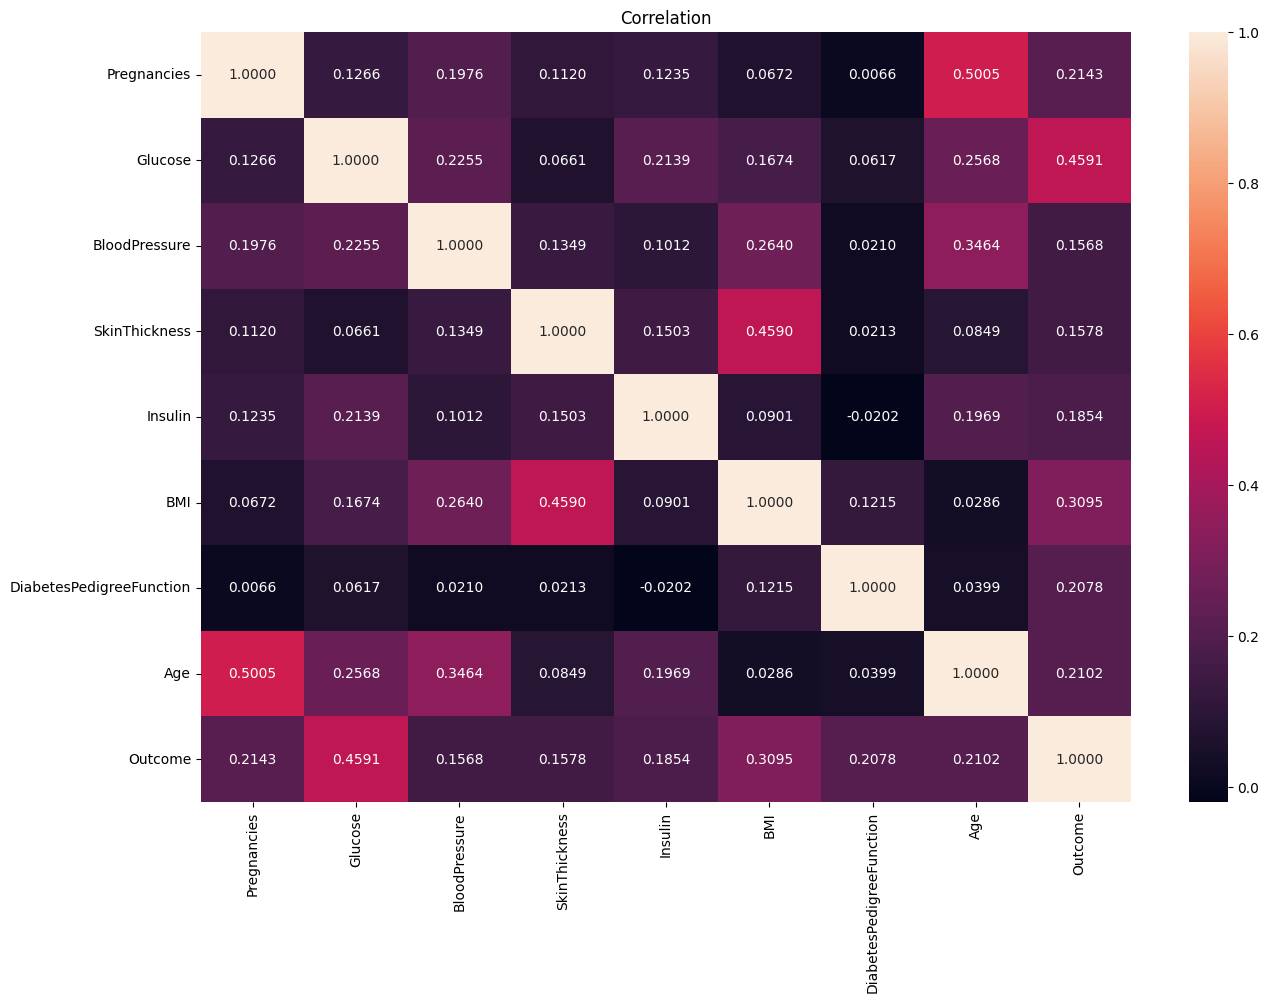

In [ ]:
#imorting figure from matplotlib
plt.figure(figsize=(15,10))
#including a heatmap it's data values are correlation between each feature
sns.heatmap(dframe.corr(), cbar =True , fmt = '.4f' , annot = True)
plt.title('Correlation')

### From the figure above we can conclude that the relation between each feature is very low as the highest correlation value observed is 0.5 So, no feature will be excluded

##Check the distribution of our features

<Axes: xlabel='Age', ylabel='Count'>

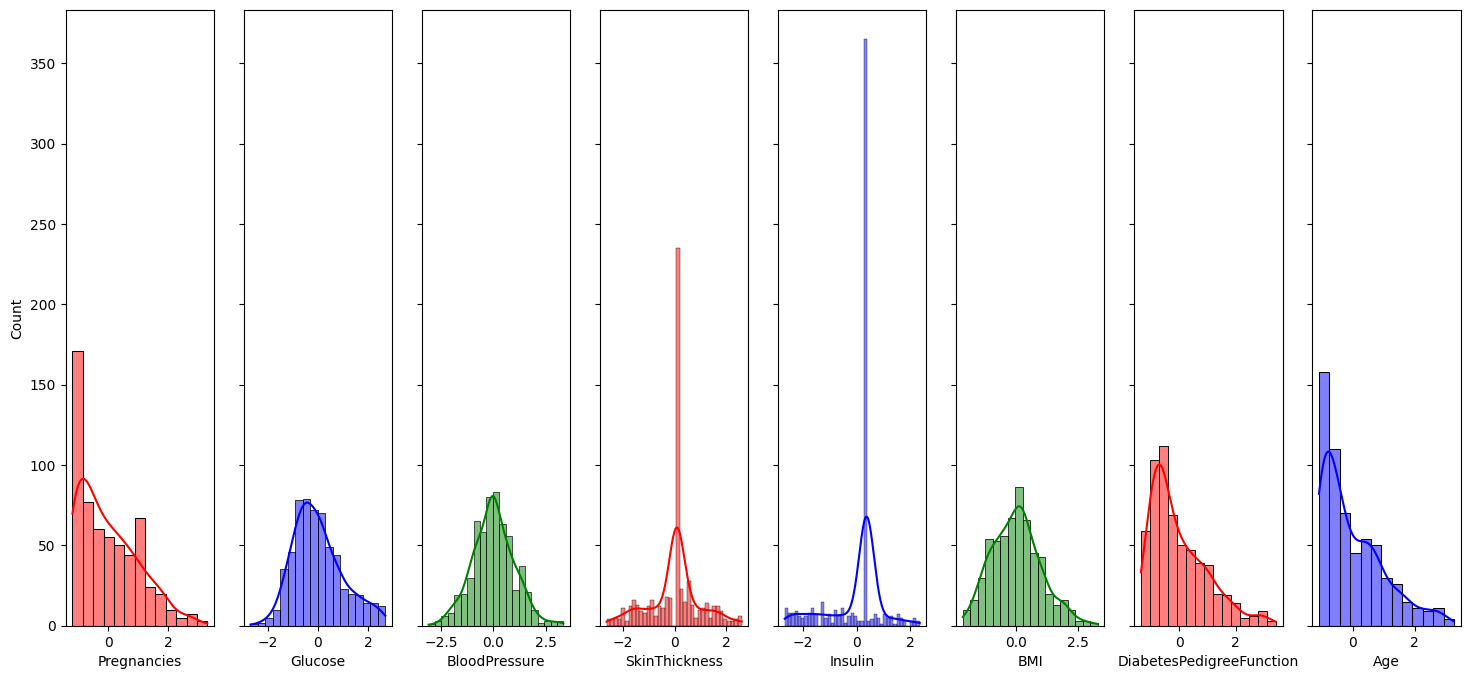

In [ ]:
#adding 8 subplots for each feature
fig, axes = plt.subplots(1, 8, figsize=(18, 8), sharey=True)
#plotting histogram for each feature using seaborn
sns.histplot(dframe, ax=axes[0], x="Pregnancies", kde=True, color='r')
sns.histplot(dframe, ax=axes[1], x="Glucose", kde=True, color='b')
sns.histplot(dframe, ax=axes[2], x="BloodPressure", kde=True, color='g')
sns.histplot(dframe, ax=axes[3], x="SkinThickness", kde=True, color='r')
sns.histplot(dframe, ax=axes[4], x="Insulin", kde=True, color='b')
sns.histplot(dframe, ax=axes[5], x="BMI", kde=True, color='g')
sns.histplot(dframe, ax=axes[6], x="DiabetesPedigreeFunction", kde=True, color='r')
sns.histplot(dframe, ax=axes[7], x="Age", kde=True, color='b')


# $P(Y|X) = \frac{{P(X|Y) \cdot P(Y)}}{{P(X)}}$

where P(Y|X) is named posterior for each value of x where x is the features

& P(X|Y) is named likelihood for each value of x

& P(Y) is named prior

& P(X) is named evidence

![(37) The Math Behind Bayesian Classifiers Clearly Explained! - YouTube - Google Chrome 6_19_2023 7_18_30 PM](https://github.com/Youssef-Ashraf71/Diabetes-Classifier/assets/83988379/cfabdc91-a900-4e2a-954a-9a9a1cb58394)


#Calculate P(Y=y) for all possible y where y is the possible outcomes

In [ ]:
#creating a function to calculate the prior probability
def calculate_prior(df, Y):
    """
    Calculate the prior probability of each outcome in the target variable.

    Parameters:
    - df: DataFrame containing the dataset.
    - Y: Name of the target variable column.

    Returns:
    - prior: List containing the prior probabilities of each outcome.
    """
    #sorted list of the outcomes 0 & 1
    classes = sorted(list(df[Y].unique()))
    #list to add the prob of outcomes in it
    prior = []
    for i in classes:
      prior.append(len(df[df[Y]==i])/len(df)) # calculating P = number of specific outcome / total number then add it to prior list
    return prior


### Verifying the 'calculate_prior' Function

Diabetic : 35.24451939291737 || Non diabetic : 64.75548060708263


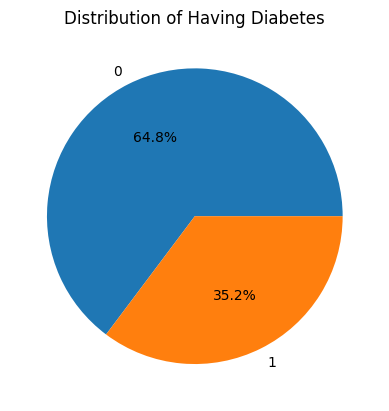

In [ ]:
non_dia ,dia = calculate_prior(dframe,Y = "Outcome")
print(f"Diabetic : {dia*100} || Non diabetic : { non_dia*100}")
# Count the occurrences of each category in the feature
counts = dframe['Outcome'].value_counts()
# Get the labels and values for the pie chart
labels = counts.index
values = counts.values
# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
# Add a title to the pie chart
plt.title('Distribution of Having Diabetes')
# Display the pie chart
plt.show()

#Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.

In [ ]:

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    """
    Calculate the likelihood probability of a feature value given a specific label using Gaussian distribution.

    Parameters:
    - df: DataFrame containing the dataset.
    - feat_name: Name of the feature.
    - feat_val: Value of the feature for which to calculate the likelihood.
    - Y: Name of the target variable column.
    - label: Value of the target variable label(Outcome).

    Returns:
    - p_x_given_y: The likelihood probability of the feature value given the label.
    """
    feat = list(df.columns)
    # decreasing our sample space to be the chosen label only in order to make the probability conditional
    df = df[df[Y]==label]
    # calculating mean and standard deviation of the feature
    mean, std = df[feat_name].mean(), df[feat_name].std()
    # # Calculate the probability Density Function using the Gaussian distribution formula
    p_x_given_y = (1/ (np.sqrt(2*np.pi)*std)) * np.exp(-((feat_val-mean)**2 / (2 * std**2)))
    return p_x_given_y

##Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [ ]:
def naive_bayes_gaussian(df, X, Y):
  """
  Naive Bayes classifier implementation using Gaussian distribution for continuous features.

  Parameters:
  - df: DataFrame containing the training dataset.
  - X: Input features array for prediction.
  - Y: Name of the target variable column.

  Returns:
  - Y_pred: Predicted labels based on the Naive Bayes classifier.
  """
  # Extracting feature names from the DataFrame columns
  features = list(df.columns)[:-1]

  # calculate the prior probabilities
  prior = calculate_prior(df, Y)

  Y_pred = []
  # loop over every data sample
  for x in X:
    # calculate the likelihood probabilities
    labels = sorted(list(df[Y].unique()))
    likelihood = [1]*len(labels)
    for j in range(len(labels)): #iterating over 0 & 1
      for i in range(len(features)): #calculating conditional prob of each feature
        likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j]) #using independency assumptions

    # calculate posterior prob. (numerator only)
    post_prob = [1]*len(labels)
    for j in range(len(labels)):
      post_prob[j] = likelihood[j] * prior[j]
    # taking the larger between the two values of posterior probability
    Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred)


#  MODEL EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split
#splitting our data set to train and test with 0.8 to 0.2 another time
# because 'the naive_bayes_gaussian' fn take the whole train data as parameter
train, test = train_test_split(dframe, test_size=.2, random_state = 41)

# Using the 'naive_bayes_gaussian' function to predict the target variable ('Outcome') using the test data
y_pred = naive_bayes_gaussian(train, X=x_test.values , Y="Outcome")

* Using SKLEARN

In [ ]:

# Printing the confusion matrix, which shows the predicted and actual values of the target variable
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
confusion_mat = metrics.confusion_matrix(y_test,y_pred)
print(confusion_mat)

# Displaying the predicted score for diabetes in female patients using the Naive Bayes model
print("THE PREDICTED SCORE FOR DIABETES IN FEMALE PATIENT USING NAIVE BAYES MODEL IS  :{}%".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

[[68 12]
 [10 29]]
THE PREDICTED SCORE FOR DIABETES IN FEMALE PATIENT USING NAIVE BAYES MODEL IS  :81.5126050420168%
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        80
           1       0.71      0.74      0.72        39

    accuracy                           0.82       119
   macro avg       0.79      0.80      0.79       119
weighted avg       0.82      0.82      0.82       119



## Evaluation Metrics


[[68 12]
 [10 29]]


<Axes: >

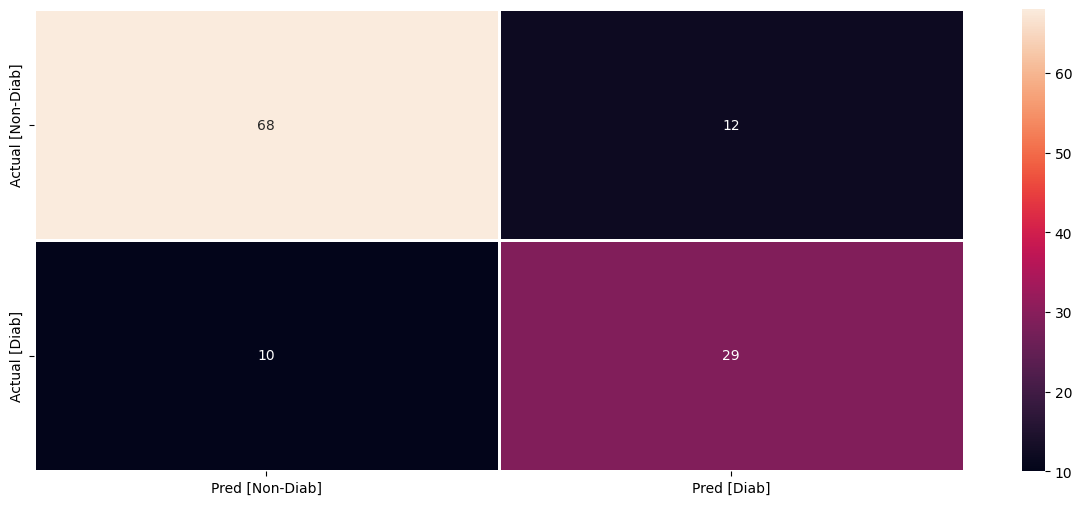

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))

ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
plt.figure(figsize=(15,6))
sns.heatmap(confusion_mat, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

<font color='Pink'>A confusion matrix</font> is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

So here:

<font color = 'Pink'>
TN = 68
</font>
||
<font color = 'Pink'>
TP = 29
</font>
||
<font color = 'Pink'>
FN = 10
</font>
||
<font color = 'Pink'>
FP = 12
</font>


This is how I interpret the confusion matrix: 0 = No Diabetes; 1 = Diabetes

TP: Our model predicted 29 women as diabetic and in actual they were diabetic (Model was correct here)

TN: Our model predicted 68 women as non-diabetic and in actual they were non-diabetic (Model was correct here)

FP: Our model predicted 12 women as diabetic and in actual they were non-diabetic (Model was wrong here - "Type 1 error")

FN: Our model predicted 10 women as non-diabetic and in actual they were diabetic (Model was wrong here - "Type 2 error")

------------------

Accuracy: Overall, how often is the classifier correct?

$Accuracy = \frac{{TP + TN}}{{\text{{total}}}} = \frac{{29 + 68}}{{29 + 68 + 10 + 12}}$

--------------------

Precision: Precsion tells us about when model predicts yes, how often is it correct.

TP/predicted yes

$Precision = \frac{TP}{{TP + FP}}= \frac{29}{{29 + 12}}=\frac{29}{{41}} $

So when our model predict 1 and actual it is 1 then it's precision is X%. It should be high as possible.

-------------------
Recall: When the actual value is positive, how often is the prediction correct?

TP/actual yes

$Recall =\frac{{TP}}{{{TP + FN}}}=\frac{29}{{29 + 10}}=\frac{29}{{39}} $

When it's actually yes, how often does model predict yes?

Recall is also known as “sensitivity” and “true positive rate” (TPR).

----------------
Specificity (True Negative Rate):

Specificity measures the proportion of correctly predicted negative samples out of all actual negative samples.

------------

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

The formula for the F1 score is: 2 (precision recall) / (precision + recall)


In [ ]:
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]

In [ ]:
# Accuracy
print(f"Accuracy of Naive Bayes Classifier is =  {(TP+TN)/(TP+TN+FP+FN)*100} %")

# Precision
Precision = TP / ( TP + FP)
print ('Precision: ', Precision*100,'%')

# Recall
Recall = TP / ( TP + FN )
print ('Recall: ',Recall)

#f1-score
f1 = f1_score(y_test, y_pred)
print('F1-Score: ',f1)

Accuracy of Naive Bayes Classifier is =  81.5126050420168 %
Precision:  70.73170731707317 %
Recall:  0.7435897435897436
F1-Score:  0.725


both recall and precision are high:

* True Positives: The number of correctly identified positive cases is high. our model is effectively capturing a large portion of the positive instances.
* False Positives: The number of falsely identified positive cases is relatively low. our model is making fewer incorrect positive predictions.
* True Negatives: The number of correctly identified negative cases is high. our model is effectively capturing a large portion of the negative instances.
* False Negatives: The number of falsely identified negative cases is relatively low. our model is making fewer incorrect negative predictions.

In summary, having high recall and high precision implies that our model is performing well in identifying both positive and negative cases accurately, leading to a smaller number of false predictions and a larger number of correct predictions.

In [ ]:
dframe['Outcome'].value_counts()

0    384
1    209
Name: Outcome, dtype: int64

We observe that number of people who do not have diabetes is more than people who do which indicates that our data is little imbalanced

However, when dealing with imbalanced datasets, it's important to consider additional evaluation metrics such as:

* Specificity (True Negative Rate):
Specificity measures the proportion of correctly predicted negative samples out of all actual negative samples.

* Balanced Accuracy:
Balanced accuracy takes into account the imbalance in class distribution by calculating the average of sensitivity and specificity.

In [ ]:
# Specificity (True Negative Rate)
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity
print ('specificity: ',specificity_score(y_test,y_pred))

# Balanced Accuracy:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print ('balanced_accuracy: ',balanced_accuracy)

specificity:  0.85
balanced_accuracy:  0.7967948717948719


-----------

## Comparing results to the case of using the NB classifier from standard Python packages

In [ ]:
classifier_NB = GaussianNB()
classifier_NB.fit(x_train, y_train)
y_predict_SKLEARN=classifier_NB.predict(x_test)

# Accuracy using Sklearn
print("THE PREDICTED SCORE FOR DIABETES IN FEMALE PATIENT USING NAIVE BAYES MODEL IS  :{}%".format(accuracy_score(y_predict_SKLEARN,y_test)*100))

# Accuracy using Naive Bayes Function we built
print("THE PREDICTED SCORE FOR DIABETES IN FEMALE PATIENT USING NAIVE BAYES MODEL IS  :{}%".format(accuracy_score(y_pred,y_test)*100))



THE PREDICTED SCORE FOR DIABETES IN FEMALE PATIENT USING NAIVE BAYES MODEL IS  :81.5126050420168%
THE PREDICTED SCORE FOR DIABETES IN FEMALE PATIENT USING NAIVE BAYES MODEL IS  :81.5126050420168%


When comparing the results of our custom Naive Bayes classifier implementation to the case of using the NB classifier from standard Python packages, it is noteworthy that both approaches achieved <font color="Red"> the same accuracy</font>.

 This indicates that our custom implementation is performing on par with the established NB classifier available in Python packages. It demonstrates the effectiveness of our implementation in accurately classifying the data. This result provides confidence in the reliability and consistency of our custom implementation, validating its ability to produce comparable results to the established solutions in the Python ecosystem.